# Chapter 4, Training Models

# Linear Regression

## The Normal Equation

In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)  # sampling from uniform([0, 2])
X[9]

array([1.44941833])

In [3]:
y = 4 + 3*X + np.random.randn(100, 1)

Plotting X, and y

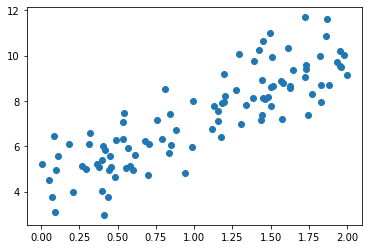

In [4]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'o')

Now, let's compute the estimated parameters using the normal equation,

$\hat{\theta} = (X^{T}X)^{-1}X^Ty$

In [5]:
X_b = np.c_[np.ones([len(X), 1]), X]

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.23910034],
       [2.91815533]])

Remember that the respective params were 4, 3 - i.e. the noise didn't allow us to recover the actual parameters.

Now we can create a function to predict new_values,

In [8]:
from np_typing import Array

def norm_predict(X_new: Array["N,1"], theta: Array["2,1"]) -> Array["N,1"]:
    X_b_new: Array["N,2"] = np.c_[np.ones([len(X_new), 1]), X_new]
    y_pred = X_b_new.dot(theta)
    return y_pred

In [9]:
X_new = np.array([[0.5], [1.], [1.5]])

In [10]:
X_new.shape

(3, 1)

In [11]:
y_pred = norm_predict(X_new, theta_best)

Let's plot this model's predictions

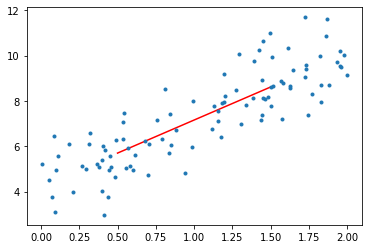

In [12]:
plt.plot(X_new, y_pred, 'r-')

plt.plot(X, y, '.')

## Batch Gradient Descent

Gradient vector of MSE cost function for the Linear Regression model is:

$$\nabla_{\theta} MSE(\theta) = \frac{2}{N}X^T(X\theta - y)$$

Note that it is called "Batch" gradient descent since it uses the entire sample to compute the gradients at each step.The gradient descent step equals

$$\theta^{next_step} = \theta - \eta \nabla_{\theta} MSE(\theta)$$

In [40]:
def gradient_descent(X: Array["N,m"], y: Array["N,1"], learning_rate=.1, min_tolerance=0.01, max_its=10000) -> Array["m+1,1"]:
    N, m = X.shape
    theta = np.zeros([m+1, 1])
    X_b = np.c_[np.ones([N, 1]), X]
    err = X_b.dot(theta) - y
    n_its = 0
    while (n_its < max_its) and (np.linalg.norm(err)/len(err) > min_tolerance):
        grad = 2/N * X_b.T.dot(err)
        theta -= learning_rate*grad
        err = X_b.dot(theta) - y
        n_its += 1
        if n_its % 1000 == 0:
            print(f"Running iteration {n_its}, error norm is {np.linalg.norm(err)/len(err)}")
    return theta

In [41]:
gradient_descent(X, y)

Running iteration 1000, error norm is 0.10483680364004863
Running iteration 2000, error norm is 0.10483680364004863
Running iteration 3000, error norm is 0.10483680364004863
Running iteration 4000, error norm is 0.10483680364004863
Running iteration 5000, error norm is 0.10483680364004863
Running iteration 6000, error norm is 0.10483680364004863
Running iteration 7000, error norm is 0.10483680364004863
Running iteration 8000, error norm is 0.10483680364004863
Running iteration 9000, error norm is 0.10483680364004863
Running iteration 10000, error norm is 0.10483680364004863


array([[4.23910034],
       [2.91815533]])

In [49]:
gradient_descent(X, y, learning_rate=.001, max_its=int(2*10**4))

Running iteration 1000, error norm is 0.11322708445406253
Running iteration 2000, error norm is 0.10935678490228198
Running iteration 3000, error norm is 0.10732621784932171
Running iteration 4000, error norm is 0.10620211116173117
Running iteration 5000, error norm is 0.10558382134321447
Running iteration 6000, error norm is 0.10524498856273434
Running iteration 7000, error norm is 0.105059681218012
Running iteration 8000, error norm is 0.10495845082328328
Running iteration 9000, error norm is 0.10490318446584915
Running iteration 10000, error norm is 0.10487302220866988
Running iteration 11000, error norm is 0.10485656384936252
Running iteration 12000, error norm is 0.10484758407569462
Running iteration 13000, error norm is 0.10484268493054202
Running iteration 14000, error norm is 0.104840012157009
Running iteration 15000, error norm is 0.10483855402484295
Running iteration 16000, error norm is 0.10483775854765336
Running iteration 17000, error norm is 0.10483732458090939
Running it

array([[4.23643791],
       [2.9203046 ]])

Notice how we cannot get rid of some error. That's because of the noise in the model!